Import Libraries

In [28]:
import pandas as pd
from p1_uml_util import *

In [29]:
def prepare_data():
    # script_path = os.path.dirname(os.path.abspath())
    #data_path = os.path.join(script_path, "data")
    #file_path = os.path.join(data_path, "data.csv")
    _df = read_csv_file('data/data.csv')
    _df['timestamp'] = pd.to_datetime(_df['timestamp'], format='%d.%m.%Y %H:%M')
    print(_df.dtypes)
    _df.set_index(lb_timestamp, inplace=True)
    print(_df.dtypes)
    return _df



In [36]:
def plot_data(_df: pd.DataFrame, lb1, lb2, legend):
    import matplotlib.pyplot as plt
    _df_to_plot = _df.copy()
    plt.plot(_df_to_plot.index, _df_to_plot[lb1], label=alias[lb_V005_vent01_CO2])
    plt.plot(_df_to_plot.index, _df_to_plot[lb2], label=alias[lb_V022_vent02_CO2])
    plt.xlabel(lb_timestamp)
    plt.ylabel(legend)
    plt.legend()
    plt.show()

Plot all the data frame regarding $CO_2$ concentration througout the day for all the days together.

timestamp               datetime64[ns]
V005_vent01_CO2                float64
V022_vent02_CO2                float64
V006_vent01_temp_out           float64
V023_vent02_temp_out           float64
dtype: object
V005_vent01_CO2         float64
V022_vent02_CO2         float64
V006_vent01_temp_out    float64
V023_vent02_temp_out    float64
dtype: object


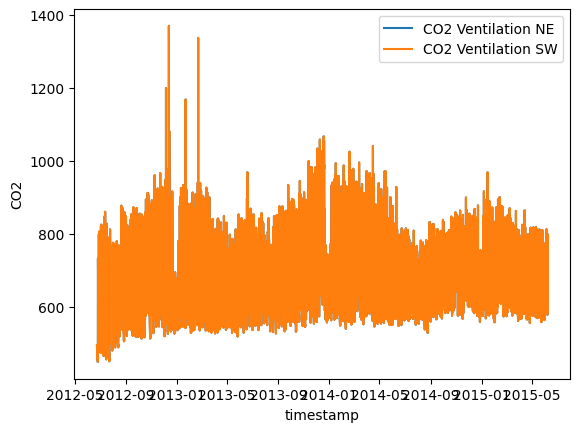

In [38]:
df = prepare_data()
plot_data(df, lb_V005_vent01_CO2, lb_V005_vent01_CO2, 'CO2') 

Stack days one above the other in the same range of ours

In [42]:
# Generate hours and days to separate columns

In [50]:
df['hour'] = df.index.hour
df['date'] = df.index.date
df.head(2)

,V005_vent01_CO2,V022_vent02_CO2,V006_vent01_temp_out,V023_vent02_temp_out,hour,day,date
timestamp,,,,,,,
2012-06-23 01:00:00,494.172532,405.514287,22.7,23.449972,1,23,2012-06-23
2012-06-23 02:00:00,491.992574,404.705170,22.7,23.400000,2,23,2012-06-23


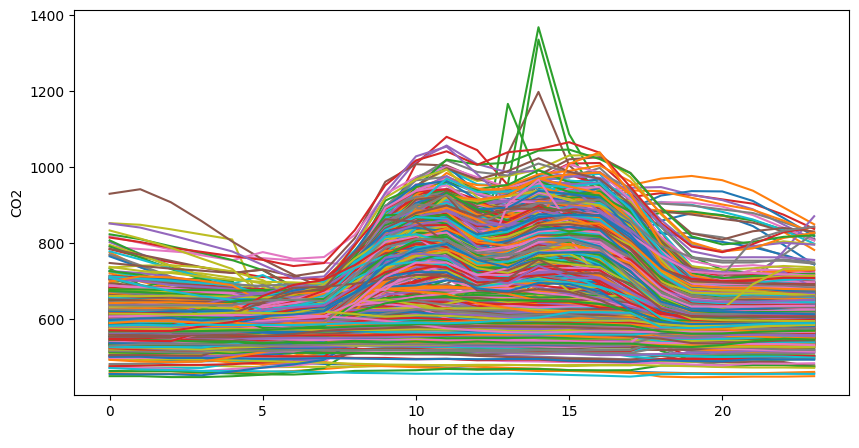

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel('CO2')
ax.set_xlabel('hour of the day')
for date, group in df.groupby('date'):
    ax.plot(group['hour'], group[lb_V005_vent01_CO2], label=date)

Check distribution using box plots

<Axes: xlabel='hour', ylabel='V005_vent01_CO2'>

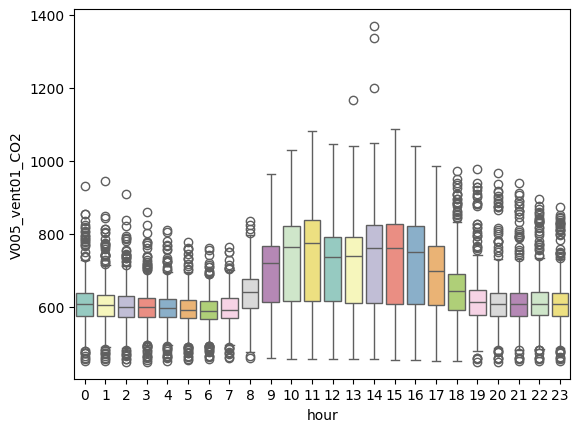

In [65]:
import seaborn as sns
sns.boxplot(x='hour', y=lb_V005_vent01_CO2, data=df, palette='Set3', hue='hour', legend=False)